Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': '111', # пароль
    'host': '111',
    'port': 111, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count ) AS total_views 
FROM stackoverflow.posts
GROUP BY DATE_TRUNC('month', creation_date)
ORDER BY SUM(views_count) DESC;
'''

df= pd.read_sql_query(query, con=engine) # выполните запрос

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

In [7]:
df

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


в итоговой таблице определенно есть различия просмотров постов по месяцам.В сентябре самое большое количество просмотров постов, к декабрю это значение постепенно снижалось, в августе просмотров было значительно меньше чем в сентябре, а в июле их было аномально мало. Могу предположить, что это связано скаким то обновлением сайта, с появлением новой технологии (нового языка программирования, новой iDE программы и  т.д.), а может все гораздо проще, в летнее время люди уезжали в отпуска, школьники и студенты уходили на каникулы и по этому онлайн на сайте упал, а вмесете с онлайном и число просмотров постов снизилось.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [8]:
# напишите запрос
query= '''
SELECT us.display_name ,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.users us
JOIN stackoverflow.posts p ON (us.id=p.user_id)
JOIN stackoverflow.post_types pt ON(p.post_type_id=pt.id)
WHERE pt.type='Answer'
  AND p.creation_date::date BETWEEN us.creation_date::date AND us.creation_date::date + INTERVAL '1 month' 
GROUP BY display_name
HAVING COUNT(p.id) > 100
ORDER BY display_name asc

'''

df_1= pd.read_sql_query(query, con=engine)# выполните запрос

Какие аномалии наблюдаются в данных? О чём они говорят?

In [9]:
df_1# напишите ваш ответ здесь

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


пользователь с ником alan сильно выделяется, он имеет аномально большое значение аж 8 уникальных значений с количеством ответов больше 100. либо он очень активный и сидит на этом сайте 24/7, либо это обычный спамер, возможно бот с рассылками, а возможно это просто 8 отдельных пользователей сидящих на одном аккаунте.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [10]:
# напишите запрос
query = '''
WITH users AS (SELECT u.id
               FROM stackoverflow.posts AS p
               JOIN stackoverflow.users AS u ON p.user_id=u.id
               WHERE DATE_TRUNC('month', u.creation_date)::date = '2008-09-01' 
                   AND DATE_TRUNC('month', p.creation_date)::date = '2008-12-01'
               GROUP BY u.id
               HAVING COUNT(p.id) > 0)

SELECT DATE_TRUNC('month', p.creation_date)::date as month,
COUNT(p.id)
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT *
                    FROM users)
      AND DATE_TRUNC('year', p.creation_date)::date = '2008-01-01'
GROUP BY DATE_TRUNC('month', p.creation_date)::date
ORDER BY DATE_TRUNC('month', p.creation_date)::date DESC;

'''

df_2= pd.read_sql_query(query,index_col='month', con=engine)# выполните запрос

Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

In [11]:
df_2

,count
month,
2008-12-01,17641
2008-11-01,18294
2008-10-01,27171
2008-09-01,24870
2008-08-01,32


в данной таблице были отобраны пользователи зарегестрировавшиеся в сентябре, но каким то образом сюда попали 32 поста оставленные в августе. Могу предположить, что это особенности выполнения sql запроса или же баг системы

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [12]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) as cumulative_count
FROM stackoverflow.posts;

'''

df_3= pd.read_sql_query(query,index_col='user_id', con=engine)# выполните запрос

In [13]:
df_3

,creation_date,views_count,cumulative_count
user_id,,,
1,2008-07-31 23:41:00,480476,480476
1,2008-07-31 23:55:38,136033,616509
1,2008-07-31 23:56:41,0,616509
1,2008-08-04 02:45:08,0,616509
1,2008-08-04 04:31:03,0,616509
...,...,...,...
5696608,2008-12-23 16:00:37,0,2804
5696608,2008-12-23 17:35:09,0,2804
5696608,2008-12-24 01:02:48,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [14]:
# напишите запрос
query = '''
SELECT 
    user_id ,
    COUNT(id)::numeric / COUNT(DISTINCT creation_date::DATE) AS avg_daily
FROM stackoverflow.posts
WHERE creation_date BETWEEN '2008-08-01' AND '2008-09-01'
GROUP BY user_id
HAVING COUNT(id) > 120
ORDER BY avg_daily ASC;

'''

df_4= pd.read_sql_query(query,index_col='user_id', con=engine)# выполните запрос

In [15]:
df_4

,avg_daily
user_id,
116,4.777778
234,5.208333
91,5.681818
905,7.000000
383,7.277778


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [16]:
# напишите запрос
query = '''
WITH daily_activity AS
(SELECT user_id,
       COUNT(DISTINCT EXTRACT(DAY FROM creation_date)) AS days_active
FROM stackoverflow.posts sp
WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
GROUP BY user_id)
SELECT ROUND(AVG(days_active))::int AS result
FROM daily_activity
'''

df_5= pd.read_sql_query(query,index_col='result', con=engine)# выполните запрос

Проанализируйте итоговую таблицу — какие выводы можно сделать?

In [17]:
df_5

""
result
2


можно сделать вывод, что в преиод с 1 по 7 декабря 2008 года в среднем пользователи публиковали 2 поста в день

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [18]:
# напишите запрос
query = '''
SELECT
    user_id ,
    creation_date ,
    TO_CHAR(LAG(DATE_TRUNC('month',creation_date)::DATE,2 )
    OVER (PARTITION BY user_id ORDER BY creation_date),'month') AS second_last_month
FROM stackoverflow.posts
ORDER BY user_id ASC, creation_date ASC;
'''

df_6= pd.read_sql_query(query,index_col='user_id', con=engine)# выполните запрос

In [19]:
df_6

,creation_date,second_last_month
user_id,,
1,2008-07-31 23:41:00,None
1,2008-07-31 23:55:38,None
1,2008-07-31 23:56:41,july
1,2008-08-04 02:45:08,july
1,2008-08-04 04:31:03,july
...,...,...
5696608,2008-12-23 16:00:37,december
5696608,2008-12-23 17:35:09,december
5696608,2008-12-24 01:02:48,december


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [20]:
# напишите запрос
query = '''
WITH profile AS (
    SELECT
        user_id,
        DATE_TRUNC('month', MIN(creation_date))::date AS cohort_dt,
        COUNT(user_id) OVER (PARTITION BY DATE_TRUNC('month', MIN(creation_date))::date)  as cohort_users_cnt
    FROM stackoverflow.posts
    GROUP BY user_id
),
sessions AS (
    SELECT
        user_id,
        DATE_TRUNC('month', creation_date)::date AS activity_month
    FROM stackoverflow.posts
    WHERE creation_date >= (SELECT MIN(cohort_dt) FROM profile)
    GROUP BY user_id, activity_month
)
SELECT
    profile.cohort_dt,
    sessions.activity_month,
    COUNT(DISTINCT sessions.user_id) as  users_cnt,
    cohort_users_cnt,
    round((COUNT(DISTINCT sessions.user_id)/ cohort_users_cnt::numeric)*100, 2) AS retention_rate
FROM profile
LEFT JOIN sessions ON profile.user_id = sessions.user_id
GROUP BY profile.cohort_dt, sessions.activity_month,cohort_users_cnt
ORDER BY profile.cohort_dt, sessions.activity_month,cohort_users_cnt,users_cnt;
'''

df_7= pd.read_sql_query(query, con=engine)# выполните запрос

In [21]:
df_7

,cohort_dt,activity_month,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

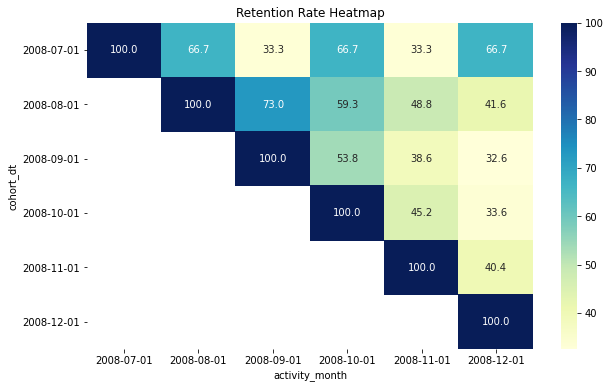

In [22]:
pivot_df = df_7.pivot("cohort_dt", "activity_month", "retention_rate")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Retention Rate Heatmap")
plt.show()

с каждым месяцем  Retention Rate падает, но пользователи которые ставили свой первый пост в июлей продолжают быть активными до конца года, чего не скажешь о пользователях которые оставили свои посты в октябре и ноябре.
пользователей которые оставили свой первый пост в декабре можно не учитывать т.к. по 1 месяцу нельзя судить о том остался пользователь активным или нет.У всех групп наблюдаеться тенденция к снижению активности, кроме первой группы , где пользователи оставили свой первый пост в июле, эта руппа достаточно активная, но активная месяц через месяц и тенденции к снижению активности у нее не наблюдаеться в отличии от остальных групп.Могу предположить, что это связано с работой этой группы или же тут попалась аномальная выборка из пользователей которые постоянно задают вопросы на stackoverflow.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [23]:
# напишите запрос
query = '''
WITH monthly_posts AS (
    SELECT
        DATE_TRUNC('month', creation_date) AS month,
        COUNT(*) AS post_count
    FROM stackoverflow.posts
    WHERE creation_date >= '2008-09-01' AND creation_date <= '2009-01-01'
    GROUP BY month
)
SELECT
    EXTRACT(MONTH FROM month) AS creation_month,
    post_count,
    ROUND(
        (post_count::numeric - LAG(post_count, 1) OVER (ORDER BY month)) / NULLIF(LAG(post_count, 1) OVER (ORDER BY month), 0) * 100, 
        2
    ) AS percentage
FROM monthly_posts
ORDER BY creation_month;
'''

df_8= pd.read_sql_query(query, con=engine)# выполните запрос

Постройте круговую диаграмму с количеством постов по месяцам.

In [24]:
df_8

,creation_month,post_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


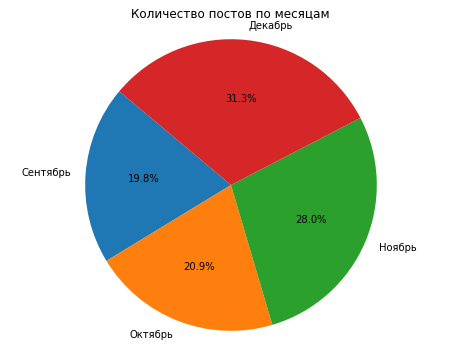

In [25]:
pivot_df = df_8.pivot('creation_month','post_count')
months, post_counts = zip(*pivot_df)
month_names = ["Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]


plt.figure(figsize=(8, 6))
plt.pie(post_counts, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Количество постов по месяцам')
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [26]:
# напишите запрос
query = '''
WITH user_post AS (SELECT user_id,
                   COUNT(DISTINCT id) AS cnt
                   FROM stackoverflow.posts
                   GROUP BY user_id
                   ORDER BY cnt DESC
                   LIMIT 1),

     dtt AS (SELECT p.user_id,
             p.creation_date,
             extract('week' from p.creation_date) AS week_number
             FROM stackoverflow.posts AS p
             JOIN user_post ON user_post.user_id = p.user_id
             WHERE DATE_TRUNC('month', p.creation_date)::date = '2008-10-01')

SELECT DISTINCT week_number::numeric,
       MAX(creation_date) OVER (PARTITION BY week_number) AS post_dt
FROM dtt
ORDER BY week_number;
'''

df_9= pd.read_sql_query(query, con=engine)# выполните запрос

In [27]:
df_9

,week_number,post_dt
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01
